# Structural Equation Modeling（SEM）

**Structural Equation Modeling（SEM）**はデータの共分散に着目した統計モデリングの手法である。日本語訳としては**共分散構造分析**や**構造方程式モデリング**と呼ばれる。

SEMは正規分布に従う誤差項を仮定する線形モデルを推定することができ、重回帰分析や因子分析などのモデルを構築可能である。


### SEMで扱えるモデル

**1. 重回帰分析**

いずれも観測変数。目的変数が1つ

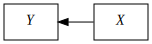

In [30]:
import graphviz

graphviz.Source("""
digraph g {
    graph [rankdir = RL];
    node [shape = rectangle];
        X [label=<<I>X</I>>]
        Y [label=<<I>Y</I>>]
    edge [];    
        X -> Y
}
""")

**2. パス解析**

いずれも観測変数。目的変数が複数

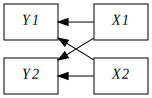

In [49]:
import graphviz

graphviz.Source("""
digraph g {
    graph [rankdir = RL];
    node [shape = rectangle];
        X1 [label=<<I>X<SUB>1</SUB></I>>]
        X2 [label=<<I>X<SUB>2</SUB></I>>]
        Y1 [label=<<I>Y<SUB>1</SUB></I>>]
        Y2 [label=<<I>Y<SUB>2</SUB></I>>]
    edge [];    
        {X1, X2} -> Y1
        {X1, X2} -> Y2
}
""")

**3. 因子分析**

潜在変数を推定する

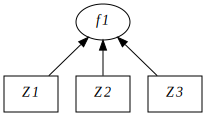

In [56]:
graphviz.Source("""
digraph g {
    graph [rankdir = BT];
    node [shape = rectangle];
        Z1 [label=<<I>Z<SUB>1</SUB></I>>]
        Z2 [label=<<I>Z<SUB>2</SUB></I>>]
        Z3 [label=<<I>Z<SUB>3</SUB></I>>]
    node [shape = ellipse];
        f1 [label=<<I>f<SUB>1</SUB></I>>]
    edge [];    
        {Z1, Z2, Z3} -> f1
}
""")

**4. 共分散構造分析**

潜在変数間の回帰も行える

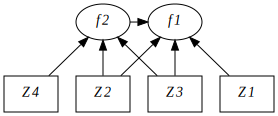

In [69]:
graphviz.Source("""
digraph g {
    graph [rankdir = BT];
    node [shape = rectangle];
        Z1 [label=<<I>Z<SUB>1</SUB></I>>]
        Z2 [label=<<I>Z<SUB>2</SUB></I>>]
        Z3 [label=<<I>Z<SUB>3</SUB></I>>]
        Z4 [label=<<I>Z<SUB>4</SUB></I>>]
    node [shape = ellipse];
        f1 [label=<<I>f<SUB>1</SUB></I>>]
        f2 [label=<<I>f<SUB>2</SUB></I>>]
    edge [];    
        {Z1, Z2, Z3} -> f1
        {Z2, Z3, Z4} -> f2
        f2 -> f1
    {rank = same f1; f2}
}
""")

## 例

### 回帰分析

In [7]:
import semopy
import numpy as np
import pandas as pd

# 適当なデータを生成
n = 1000
np.random.seed(0)
x1 = np.random.uniform(size=n)
x2 = np.random.uniform(size=n)
e = np.random.normal(size=n)
y = 10 + 3 * x1 + 5 * x2 + e
data = pd.DataFrame(dict(y=y, x1=x1, x2=x2))

# モデルを構築
desc = "y ~ x1 + x2"
model = semopy.Model(desc)
model.fit(data)
model.inspect()

,lval,op,rval,Estimate,Std. Err,z-value,p-value
0,y,~,x1,2.925376,0.105805,27.648636,0.0
1,y,~,x2,4.870594,0.102847,47.357702,0.0
2,y,~~,y,0.945340,0.042277,22.360680,0.0


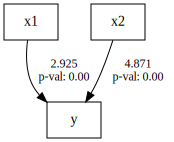

In [6]:
# パス図
semopy.semplot(model, filename="/tmp/path_diagram.png")

## モデリングで用いる変数の分類

3つの軸がある

### 観測変数と潜在変数

- **観測変数**（observed variable）：直接観測することが可能な変数（例：年収、身長など）
- **潜在変数**（latent variable）：直接観測することができず、モデルから推定される変数（例：学力、プライドの高さなど）

### 構造変数と誤差変数

- **構造変数**：分析の対象となっている構成概念の変動を含んでいる変数
- **誤差変数**：モデルで説明しきれない要因による変動を含む変数

### 外生変数と内生変数

- **外生変数**：モデル内で1度も他の変数の結果にならない変数（推定の方程式の左辺に置かれない変数）
- **内生変数**：少なくとも1回は他の変数の結果となる変数



## モデリングに用いる方程式

### 構造方程式

構造変数同士の関係性の推定のために用いる。

例えば方程式の両辺が観測変数の場合は回帰分析に相当する。
（潜在変数同士で構造方程式を組むこともできる）

Rの{lavaan}パッケージやPythonのsemopyパッケージでは`~`の演算子を用いる。例えば

```
y ~ x1 + x2
```

のように表現される

### 測定方程式

潜在変数の推定のために用いる

Rの{lavaan}パッケージやPythonのsemopyパッケージでは`~~`の演算子を用いる。例えば

```
f =~ x1 + x2
```

のように表現される

## パス図

SEMのモデルを視覚的にわかりやすく表現したものがパス図。

記法のルールとしては

1. 観測変数は四角形で囲む
2. 潜在変数は円で囲む
3. 誤差変数は囲まない
4. 影響を与える変数から、与えられる変数に単方向の矢印を書き、矢印に因果の影響力を示す数値を付与する
5. 共変動を示す2つの外生変数に因果関係を仮定しないとき、双方向の矢印を書き、矢印に共分散あるいは相関を示す数値を付与する